In [2]:
### 无向图

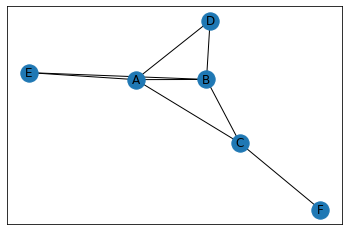

全部节点为： ['A', 'B', 'C', 'D', 'E', 'F']
全部边为： [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')]
全部边数量： 8


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
 
# 无向图网络
G1 = nx.Graph()
G1.add_edge('A', 'B')
G1.add_edge('A', 'C')
G1.add_edge('A', 'D')
G1.add_edge('A', 'E')
G1.add_edge('B', 'C')
G1.add_edge('B', 'D')
G1.add_edge('B', 'E')
G1.add_edge('F', 'C')
 
nx.spring_layout(G1)
nx.draw_networkx(G1)
plt.show()
print('全部节点为：', G1.nodes())
print('全部边为：', G1.edges())
print('全部边数量：', G1.number_of_edges())

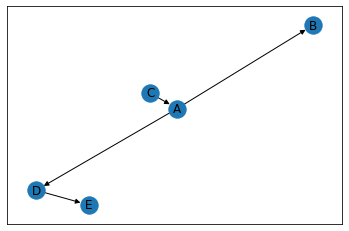

In [3]:
# 有向图网络
G2 = nx.DiGraph()
G2.add_edge('A', 'B')
G2.add_edge('A', 'D')
G2.add_edge('C', 'A')
G2.add_edge('D', 'E')
 
nx.spring_layout(G2)
nx.draw_networkx(G2)
plt.show()

In [10]:
# 其他属性

print('G1中A的度数：', nx.degree(G1, 'A'))
print('G1中A的局部聚类系数：', nx.clustering(G1, 'A'))
print('G1中两个点的最短路径：', nx.shortest_path(G1, 'A', 'F'))
print('G3中两个点的最短路径长度：', nx.shortest_path_length(G2, 'D', 'E'))
print('G1的节点离心度：', nx.eccentricity(G1))

G1中A的度数： 4
G1中A的局部聚类系数： 0.5
G1中两个点的最短路径： ['A', 'C', 'F']
G3中两个点的最短路径长度： 1
G1的节点离心度： {'A': 2, 'B': 2, 'C': 2, 'D': 3, 'E': 3, 'F': 3}


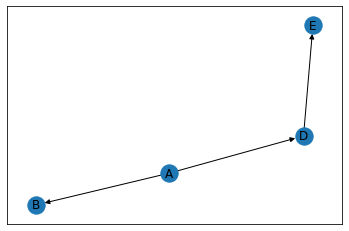

In [4]:
# 某一点到其他点的BFS图

T = nx.bfs_tree(G2, 'A')
nx.draw_networkx(T)
plt.show()

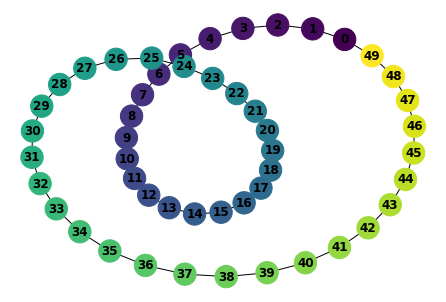

In [8]:
G4 = nx.cycle_graph(50)
pos = nx.spring_layout(G4, iterations=200)
nx.draw(G4, pos, node_color=range(50), node_size=500, font_weight='bold', with_labels=True)
plt.show()


### How to set colors for nodes in NetworkX?
在 draw 里面, 用 node_color 指定每一个点的颜色,如上.
也可以如下, 对 node_color 给一个 list, 其中 list 的每一个元素就对应么一个点的颜色.

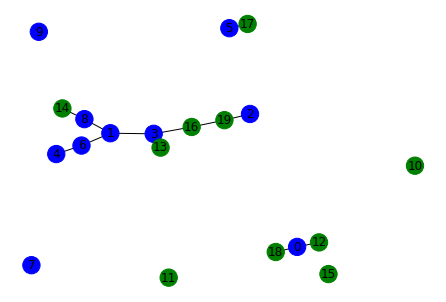

In [12]:
G = nx.erdos_renyi_graph(20, 0.1)
color_map = []
for node in G:
    if node < 10:
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [ ]:
# 节点大小
在 nx.draw(G, node_size=size)，node_size 表示一个节点的大小,其中size可以是一個標量或長度等於節點數的數組。

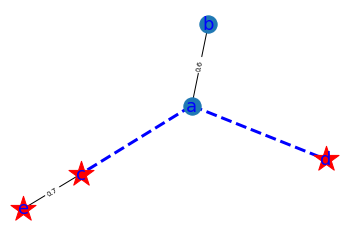

In [11]:
# 实例
# 导入带权图
G = nx.Graph()
G.add_edges_from([('a', 'b', {'weight': 0.6}),
                  ('a', 'c', {'weight': 0.2}),
                  ('a', 'd', {'weight': 0.1}),
                  ('c', 'e', {'weight': 0.7})])
# 对不同权重进行处理，取得相应权重的点集列表，比如weight>0.5的点集列表为[('a', 'b'), ('c', 'e')]
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
node1 = ['a', 'b']
node2 = ['c', 'd', 'e']
edge = {(u, v): d['weight'] for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5}  # 加权处理
# 必须设定一个统一的布局，保证下面分步绘制的图的统一性，而且分步绘制时pos是一个必须参数
pos = nx.spring_layout(G)
# 分步绘制完整的图
# (1)绘制点，必须参数（G，pos）,还可以指定点集（列表或optional）（默认全点集），形状，大小，透明度，等
nx.draw_networkx_nodes(G, pos=pos, nodelist=node1)  # > 0.5
nx.draw_networkx_nodes(G, pos=pos, nodelist=node2, node_shape='*', node_color='r', node_size=700)
# (2)绘制边，必须参数（G，pos, 还可以指定边集（边的元组集合(列表)）（默认全边集），形状，大小，透明度，等
nx.draw_networkx_edges(G, pos=pos, edgelist=elarge)
nx.draw_networkx_edges(G, pos=pos, edgelist=esmall, edge_color='b', style='dashed', width=3)
# (3)绘制部分节点的标签，必须参数（G，pos），还可以指定点集（字典(值)或optional）（默认全点集），形状，大小，透明度，等
nx.draw_networkx_labels(G, pos=pos, labels={'a': 'a', 'b':'b', 'c': 'c', 'd': 'd', 'e': 'e'}, font_size=18, font_color='b', font_family='sans-serif')
# (4)绘制边的标签，必须参数（G，pos）,还可以指定边集（字典：键是边的元组，值是边的某个属性值）（默认全边集），形状，大小，透明度，等
# 根据字典，通过键给边添加值的标签，{('a', 'b'): 0.6, ('c', 'e'): 0.7}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge, font_size=7, font_color='black', font_family='sans-serif')
# 显示
plt.axis('off')
plt.show()

## NetworkX系列教程(1)-创建graph

In [2]:
#导入相应的包
import networkx as nx
from PIL import Image
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import to_pydot
from matplotlib.font_manager import *  

#定义自定义字体，文件名从1.b查看系统中文字体中来,这是Linux字体路径,windows系统的字体路径自查
#myfont = FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc')  
#解决负号'-'显示为方块的问题  
#matplotlib.rcParams['axes.unicode_minus']=False 

#定义图的节点和边
nodes=['0','1','2','3','4','5','a','b','c']
edges=[('0','0',1),('0','1',1),('0','5',1),('0','5',2),('1','2',3),('1','4',5),('2','1',7),('2','4',6),('a','b',0.5),('b','c',0.5),('c','a',0.5)]

#用于显示图片
def ShowGraph(G):
    #使用pydot保存图片
    P=to_pydot(G)                                                               
    P.write_jpeg('pydot.png')
    
    #使用matplotlib保存图片
    pos=nx.shell_layout(G)
    nx.draw(G,pos,with_labels=True)
    plt.savefig('mat.png')
    plt.close()  
    
    #将前面两张图显示
    plt.subplots(figsize=(12,6))
    #plt.suptitle('Diffrent')
    #载入matplotlib的图片
    plt.subplot(1,2,1)
    plt.title('matplotlib')
    plt.imshow(Image.open('mat.png'))
    #plt.axis('off')
    #去掉坐标刻度
    plt.xticks([])
    plt.yticks([])
    
    #载入pydot的图片
    plt.subplot(1,2,2)
    plt.title('pydot')
    plt.imshow(Image.open('pydot.png'))
    #plt.axis('off')
    #去掉坐标刻度
    plt.xticks([])
    plt.yticks([])
    
    #显示图片
    plt.show() 

#### 1.2有自循环的无向图

In [4]:
#定义无向图
G = nx.Graph()

#往图添加节点和边
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

#显示图片
ShowGraph(G)

FileNotFoundError: [Errno 2] "dot" not found in path.

In [1]:
#graph_atlas的图已经被定义,只需要按标号取出来就可以,下面将前10个取出来
plt.subplots(2,5,figsize=(15,6))
for ind in range(10):
    G.clear()
    
    G=nx.graph_atlas(ind)
    plt.subplot(2,5,ind+1)
    nx.draw(G,with_labels=True)
    
    #下面是设置图片
    plt.axis('on')
    plt.title('graph_atlas_%s'%ind)
    plt.xticks([])
    plt.yticks([])
plt.show()
plt.close()

NameError: name 'plt' is not defined